# Esame 13/06/2023

# Parte 1: Analisi
## 1.1:
### Risposta:
1. 614
2. No ci sono dei missing values
3. No è sbilanciato

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Data/loan_sanction_train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape[0]

614

In [5]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df.groupby("Loan_Status")["Gender"].count()

Loan_Status
N    187
Y    414
Name: Gender, dtype: int64

## 1.2:

### Risposta:
1. Le percentuali sono simili di restituzione del debito, leggermente più difficili per le donne
2.


<AxesSubplot:xlabel='Gender'>

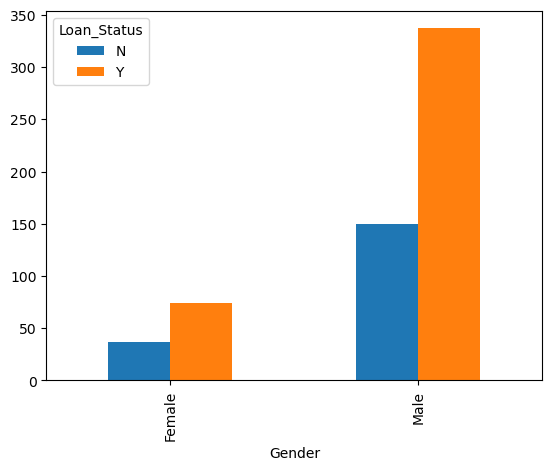

In [7]:
pd.pivot_table(df, 'Married', index="Gender", columns='Loan_Status', aggfunc='count').plot(kind="bar")

In [15]:
new_df = df.copy()
new_df_female = df.loc[df.Gender == "Female"]
new_df_male = df.loc[df.Gender == "Male"]
new_df_female.groupby("Loan_Status")["Married"].count() / len(new_df_female)

Loan_Status
N    0.330357
Y    0.660714
Name: Married, dtype: float64

In [16]:
new_df_male.groupby("Loan_Status")["Married"].count() / len(new_df_male)

Loan_Status
N    0.306748
Y    0.689162
Name: Married, dtype: float64

In [21]:
pd.pivot_table(df, 'Gender', index="Married", values='Loan_Status',columns=["Gender"], fill_value=0)

TypeError: pivot_table() got multiple values for argument 'values'

## 1.3:

### Risposta:
1. dai dati sembra che sia più probabile che non c'è questa tendenza


In [32]:
high_price = new_df.loc[new_df.LoanAmount > 300]

costs = pd.cut(new_df["LoanAmount"] ,bins=5)
new_df["LoanAmount"] = costs.values

new_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,"(8.309, 147.2]",360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,"(8.309, 147.2]",360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,"(8.309, 147.2]",360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,"(8.309, 147.2]",360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,"(8.309, 147.2]",360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,"(8.309, 147.2]",180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,"(147.2, 285.4]",360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,"(147.2, 285.4]",360.0,1.0,Urban,Y


<AxesSubplot:xlabel='LoanAmount'>

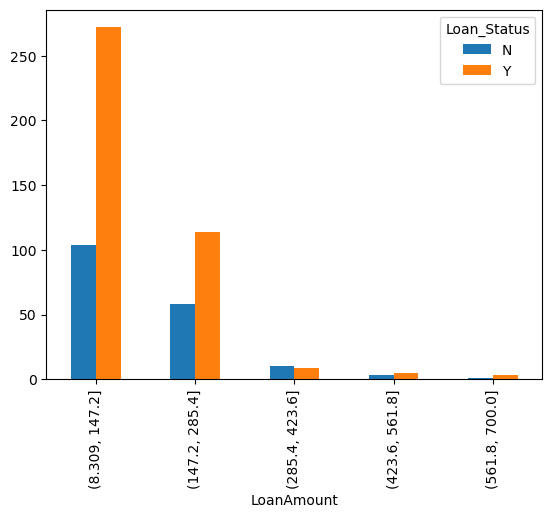

In [33]:
pd.pivot_table(new_df, 'Gender', index="LoanAmount", columns='Loan_Status', aggfunc='count').plot(kind="bar")

## 1.4:


In [176]:
new_df = df.copy()

In [177]:
new_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


KeyError: 'ApplicationIncome'

# Parte 2:

## 1.1

In [34]:
new_df = df.copy()
new_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [36]:
new_df.drop("Loan_ID",axis=1,inplace=True)
# è dannoso avere questo attributo perchè è univoco

KeyError: "['Loan_ID'] not found in axis"

In [38]:
new_df = new_df.dropna()
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [37]:
columns_names = new_df.columns
columns_names

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [39]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
new_df = encoder.fit_transform(new_df)
new_df = pd.DataFrame(new_df,columns=columns_names)
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,1.0,1.0,0.0,0.0,247.0,50.0,76.0,7.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0,1.0,112.0,0.0,23.0,7.0,1.0,2.0,1.0
2,1.0,1.0,0.0,1.0,0.0,74.0,135.0,68.0,7.0,1.0,2.0,1.0
3,1.0,0.0,0.0,0.0,0.0,305.0,0.0,89.0,7.0,1.0,2.0,1.0
4,1.0,1.0,2.0,0.0,1.0,281.0,196.0,159.0,7.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.0,0.0,0.0,0.0,0.0,101.0,0.0,26.0,7.0,1.0,0.0,1.0
476,1.0,1.0,3.0,0.0,0.0,219.0,0.0,7.0,4.0,1.0,0.0,1.0
477,1.0,1.0,1.0,0.0,0.0,344.0,3.0,154.0,7.0,1.0,2.0,1.0
478,1.0,1.0,2.0,0.0,0.0,336.0,0.0,126.0,7.0,1.0,2.0,1.0


In [40]:
y = new_df["Loan_Status"]
new_df.drop("Loan_Status",axis=1,inplace=True)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_df, y,test_size=1/3,
                                                    random_state=0)


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix

def test_model(name ,model,train_data, test_data, train_labels, test_labels):
    model.fit(train_data,train_labels)
    train_preds = np.round(model.predict(train_data))
    test_preds = np.round(model.predict(test_data))
    print(f" ===== {name} =====")
    print(f"Accuracy on train {accuracy_score(train_labels, train_preds)}")
    print(f"Accuracy on test {accuracy_score(test_labels, test_preds)}")
    print("Confusion matrix on test")
    print(confusion_matrix(test_labels, test_preds))


classifiers = [DecisionTreeClassifier(), KNeighborsClassifier(), DummyClassifier()]

names = ["Decision Tree","KNN", "dummy"]

for model,name in zip(classifiers,names):
    test_model(name,model, X_train, X_test, y_train, y_test)

 ===== Decision Tree =====
Accuracy on train 1.0
Accuracy on test 0.66875
Confusion matrix on test
[[25 29]
 [24 82]]
 ===== KNN =====
Accuracy on train 0.75625
Accuracy on test 0.625
Confusion matrix on test
[[10 44]
 [16 90]]
 ===== dummy =====
Accuracy on train 0.70625
Accuracy on test 0.6625
Confusion matrix on test
[[  0  54]
 [  0 106]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

## Osservazioni:
1. Nella Confusion Matrix del DT e del KNN il numero di TP ( cioè il numero di prestiti  predentti che non sono stati estinti e sono stati predetti correttamente) è basso
2. L'accuratezza decade notevolmente tra il dataset di train e quello di test
3. Per lo sbilanciamento della classe da predire, l'accuratezza non si può considerare come una metrica completamente affidabile

# 1.2:


In [44]:
from sklearn.model_selection import cross_val_score
for model,name in zip(classifiers,names):
    scores = cross_val_score(model,new_df,y,cv=10)
    print(f"{name}:")
    print("media degli accuracy score: ",scores.mean())
    print(scores)

Decision Tree:
media degli accuracy score:  0.725
[0.79166667 0.75       0.72916667 0.64583333 0.77083333 0.72916667
 0.79166667 0.6875     0.8125     0.54166667]
KNN:
media degli accuracy score:  0.65625
[0.75       0.625      0.6875     0.625      0.66666667 0.6875
 0.66666667 0.58333333 0.60416667 0.66666667]
dummy:
media degli accuracy score:  0.6916666666666667
[0.6875     0.6875     0.6875     0.6875     0.6875     0.6875
 0.6875     0.6875     0.70833333 0.70833333]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

## 1.3:


In [45]:
from sklearn.model_selection import GridSearchCV
params={"n_neighbors":[2,5,10,15], "weights":("unifrom","distance")}

knn = classifiers[1]
grid_model = GridSearchCV(knn,params)
grid_model.fit(new_df,y)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 196, in fit
    self.weights = _check_weights(self.weights)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_base.py", line 82, in _check_weights
    raise ValueError(
ValueError: weights not re

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 5, 10, 15],
                         'weights': ('unifrom', 'distance')})

In [46]:
test_model("GridSearch KNN",grid_model,X_train,X_test,y_train,y_test)

 ===== GridSearch KNN =====
Accuracy on train 1.0
Accuracy on test 0.6625
Confusion matrix on test
[[  5  49]
 [  5 101]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", line 196, in fit
    self.weights = _check_weights(self.weights)
  File "/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_base.py", line 82, in _check_weights
    raise ValueError(
ValueError: weights not re

In [47]:
grid_model.best_params_

{'n_neighbors': 15, 'weights': 'distance'}

In [48]:
knn.set_params(**grid_model.best_params_)
test_model("KNN with best params of GridSearch",knn,X_train,X_test,y_train,y_test)

 ===== KNN with best params of GridSearch =====
Accuracy on train 1.0
Accuracy on test 0.6625
Confusion matrix on test
[[  5  49]
 [  5 101]]


# 1.4:


In [50]:
new_df_male.drop("Loan_ID",axis=1,inplace=True)

/var/folders/zk/y_05r4dd4q51x5hx9n0nwwk80000gn/T/ipykernel_1531/3141797837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_male.drop("Loan_ID",axis=1,inplace=True)


In [52]:
new_df_male.dropna(inplace=True)

new_df_male = encoder.fit_transform(new_df_male)
new_df_male = pd.DataFrame(new_df_male,columns=columns_names)

/var/folders/zk/y_05r4dd4q51x5hx9n0nwwk80000gn/T/ipykernel_1531/1310776677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_male.dropna(inplace=True)


In [53]:
new_df_male

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,1.0,0.0,0.0,206.0,48.0,70.0,7.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,91.0,0.0,17.0,7.0,1.0,2.0,1.0
2,0.0,1.0,0.0,1.0,0.0,57.0,125.0,62.0,7.0,1.0,2.0,1.0
3,0.0,0.0,0.0,0.0,0.0,260.0,0.0,83.0,7.0,1.0,2.0,1.0
4,0.0,1.0,2.0,0.0,1.0,236.0,181.0,146.0,7.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
389,0.0,1.0,2.0,1.0,0.0,177.0,38.0,96.0,7.0,1.0,0.0,1.0
390,0.0,1.0,0.0,0.0,0.0,117.0,91.0,50.0,7.0,1.0,0.0,1.0
391,0.0,1.0,3.0,0.0,0.0,185.0,0.0,5.0,4.0,1.0,0.0,1.0
392,0.0,1.0,1.0,0.0,0.0,296.0,3.0,142.0,7.0,1.0,2.0,1.0


In [54]:
y = new_df_male["Loan_Status"]
new_df_male.drop("Loan_Status",axis=1,inplace=True)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(new_df_male, y,test_size=1/3,
                                                    random_state=0)
for model,name in zip(classifiers,names):
    print("Accuracy with only Male:")
    test_model(name,model, X_train, X_test, y_train, y_test)

 ===== Decision Tree =====
Accuracy on train 1.0
Accuracy on test 0.6742424242424242
Confusion matrix on test
[[26 16]
 [27 63]]
 ===== KNN =====
Accuracy on train 1.0
Accuracy on test 0.6742424242424242
Confusion matrix on test
[[ 2 40]
 [ 3 87]]
 ===== dummy =====
Accuracy on train 0.7175572519083969
Accuracy on test 0.6818181818181818
Confusion matrix on test
[[ 0 42]
 [ 0 90]]


In [65]:
new_df_female = df.loc[df.Gender == "Female"]
new_df_female.drop("Loan_ID",axis=1,inplace=True)
new_df_female.dropna(inplace=True)
new_df_female

/var/folders/zk/y_05r4dd4q51x5hx9n0nwwk80000gn/T/ipykernel_1531/3447654767.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_female.drop("Loan_ID",axis=1,inplace=True)
/var/folders/zk/y_05r4dd4q51x5hx9n0nwwk80000gn/T/ipykernel_1531/3447654767.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_female.dropna(inplace=True)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
17,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
37,Female,Yes,0,Graduate,No,3667,1459.0,144.0,360.0,1.0,Semiurban,Y
48,Female,Yes,0,Graduate,No,2645,3440.0,120.0,360.0,0.0,Urban,N
49,Female,No,0,Graduate,No,4000,2275.0,144.0,360.0,1.0,Semiurban,Y
50,Female,Yes,0,Not Graduate,No,1928,1644.0,100.0,360.0,1.0,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
582,Female,Yes,0,Graduate,No,3166,0.0,36.0,360.0,1.0,Semiurban,Y
587,Female,No,0,Not Graduate,No,2165,0.0,70.0,360.0,1.0,Semiurban,Y
604,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y


In [66]:
new_df_female = encoder.fit_transform(new_df_female)
new_df_female = pd.DataFrame(new_df_female,columns=columns_names)
new_df_female

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,0.0,0.0,37.0,0.0,16.0,4.0,0.0,2.0,0.0
1,0.0,1.0,0.0,0.0,0.0,39.0,3.0,44.0,4.0,1.0,1.0,1.0
2,0.0,1.0,0.0,0.0,0.0,20.0,20.0,34.0,4.0,0.0,2.0,0.0
3,0.0,0.0,0.0,0.0,0.0,44.0,12.0,44.0,4.0,1.0,1.0,1.0
4,0.0,1.0,0.0,1.0,0.0,4.0,6.0,23.0,4.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.0,1.0,0.0,0.0,0.0,28.0,0.0,2.0,4.0,1.0,1.0,1.0
82,0.0,0.0,0.0,1.0,0.0,10.0,0.0,14.0,4.0,1.0,1.0,1.0
83,0.0,1.0,1.0,0.0,0.0,71.0,0.0,61.0,4.0,1.0,1.0,1.0
84,0.0,0.0,0.0,0.0,0.0,22.0,0.0,15.0,4.0,1.0,0.0,1.0


In [67]:
y = new_df_female["Loan_Status"]
new_df_female.drop("Loan_Status",axis=1,inplace=True)

X_train, X_test, y_train, y_test = train_test_split(new_df_female, y,test_size=1/3,
                                                    random_state=0)
for model,name in zip(classifiers,names):
    print("Accuracy with only Female:")
    test_model(name,model, X_train, X_test, y_train, y_test)

Accuracy with only Female:
 ===== Decision Tree =====
Accuracy on train 1.0
Accuracy on test 0.7586206896551724
Confusion matrix on test
[[11  4]
 [ 3 11]]
Accuracy with only Female:
 ===== KNN =====
Accuracy on train 1.0
Accuracy on test 0.5172413793103449
Confusion matrix on test
[[ 1 14]
 [ 0 14]]
Accuracy with only Female:
 ===== dummy =====
Accuracy on train 0.7017543859649122
Accuracy on test 0.4827586206896552
Confusion matrix on test
[[ 0 15]
 [ 0 14]]


In [93]:
new_df = df.copy()
new_df_out_gender = new_df.drop("Gender",axis=1)
new_df_out_gender

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [94]:
new_df_out_gender.drop("Loan_ID",axis=1,inplace=True)
new_df_out_gender.dropna(inplace=True)

In [97]:
columns = new_df_out_gender.columns

In [98]:
new_df_out_gender = encoder.fit_transform(new_df_out_gender)

new_df_out_gender = pd.DataFrame(new_df_out_gender,columns=columns)
new_df_out_gender

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,1.0,0.0,0.0,253.0,50.0,76.0,7.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,115.0,0.0,23.0,7.0,1.0,2.0,1.0
2,1.0,0.0,1.0,0.0,76.0,137.0,68.0,7.0,1.0,2.0,1.0
3,0.0,0.0,0.0,0.0,311.0,0.0,89.0,7.0,1.0,2.0,1.0
4,1.0,2.0,0.0,1.0,287.0,198.0,160.0,7.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
487,0.0,0.0,0.0,0.0,104.0,0.0,26.0,7.0,1.0,0.0,1.0
488,1.0,3.0,0.0,0.0,225.0,0.0,7.0,4.0,1.0,0.0,1.0
489,1.0,1.0,0.0,0.0,350.0,3.0,155.0,7.0,1.0,2.0,1.0
490,1.0,2.0,0.0,0.0,342.0,0.0,127.0,7.0,1.0,2.0,1.0


In [99]:

y = new_df_out_gender["Loan_Status"]
new_df_out_gender.drop("Loan_Status",axis=1,inplace=True)


X_train, X_test, y_train, y_test = train_test_split(new_df_out_gender, y,test_size=1/3,
                                                    random_state=0)
for model,name in zip(classifiers,names):
    print("Accuracy with out Gender:")
    test_model(name,model, X_train, X_test, y_train, y_test)

Accuracy with out Gender:
 ===== Decision Tree =====
Accuracy on train 1.0
Accuracy on test 0.6524390243902439
Confusion matrix on test
[[20 30]
 [27 87]]
Accuracy with out Gender:
 ===== KNN =====
Accuracy on train 1.0
Accuracy on test 0.6890243902439024
Confusion matrix on test
[[  9  41]
 [ 10 104]]
Accuracy with out Gender:
 ===== dummy =====
Accuracy on train 0.6859756097560976
Accuracy on test 0.6951219512195121
Confusion matrix on test
[[  0  50]
 [  0 114]]


In [114]:
new_df_out_gender_and_married = df.copy()
new_df_out_gender_and_married.drop("Gender",axis=1,inplace=True)
new_df_out_gender_and_married.drop("Married",axis=1,inplace=True)

new_df_out_gender_and_married.dropna(inplace=True)

In [115]:
columns = new_df_out_gender_and_married.columns

In [116]:
new_df_out_gender_and_married = encoder.fit_transform(new_df_out_gender_and_married)

new_df_out_gender_and_married = pd.DataFrame(new_df_out_gender_and_married,columns=columns)


In [117]:
y = new_df_out_gender_and_married["Loan_Status"]
new_df_out_gender_and_married.drop("Loan_Status",axis=1,inplace=True)


X_train, X_test, y_train, y_test = train_test_split(new_df_out_gender_and_married, y,test_size=1/3,
                                                    random_state=0)
for model,name in zip(classifiers,names):
    print("Accuracy with out Gender and Married:")
    test_model(name,model, X_train, X_test, y_train, y_test)

Accuracy with out Gender and Married:
 ===== Decision Tree =====
Accuracy on train 1.0
Accuracy on test 0.7195121951219512
Confusion matrix on test
[[26 24]
 [22 92]]
Accuracy with out Gender and Married:
 ===== KNN =====
Accuracy on train 1.0
Accuracy on test 0.6707317073170732
Confusion matrix on test
[[  3  47]
 [  7 107]]
Accuracy with out Gender and Married:
 ===== dummy =====
Accuracy on train 0.6859756097560976
Accuracy on test 0.6951219512195121
Confusion matrix on test
[[  0  50]
 [  0 114]]


## 1.5


In [122]:
from sklearn.pipeline import Pipeline
new_df = df.copy()

In [123]:
new_df.drop("Loan_ID",axis=1,inplace=True)
y = new_df["Loan_Status"]
new_df.drop("Loan_Status",axis=1,inplace=True)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(new_df, y,test_size=(1/3),
                                                    random_state=0)

In [153]:
from  sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import SelectKBest


impute = SimpleImputer(strategy="most_frequent")
norma = Normalizer()
encoder = OrdinalEncoder()
kbin = KBinsDiscretizer(n_bins=10)
kbest = SelectKBest(k=5)


In [170]:
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [171]:
categorical = ["Dependents","Property_Area", "Education", "Married","Gender","Self_Employed"]
numerical = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]
X_train.columns.get_indexer(numerical)

array([5, 6, 7, 8, 9])

In [172]:

#categoric_trasform = ColumnTransformer(transformers=[("categorical",encoder),X_train.columns.get_indexer(categorical)],remainder="passthrough")

column_trasform = ColumnTransformer(transformers=[("numerical",norma,X_train.columns.get_indexer(numerical)),
                                                  ("categorical",encoder,X_train.columns.get_indexer(categorical))
                                                  ], remainder="passthrough")

bins_trasform = ColumnTransformer(transformers=[("bins",kbin,[X_train.columns.get_loc("LoanAmount")])],remainder="passthrough")

preprocessing = Pipeline(steps=[("impute",impute),("column_trasform",column_trasform),("bins_trasform",bins_trasform), ("kbest",kbest)],verbose=True)

pipeline = Pipeline(steps=[("preprocessing",preprocessing),("model",KNeighborsClassifier())],verbose=True)

In [173]:
test_model("Pipeline",pipeline, X_train, X_test, y_train, y_test)

[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken 

TypeError: loop of ufunc does not support argument 0 of type str which has no callable rint method

# 1.6

In [175]:

params={'model__n_neighbors': [10,5,3,2],
        'model__weights':("unifrom","distance"),
        'preprocessing__bins_trasform__bins__n_bins': [10,15,2],
        'preprocessing__kbest__k': [2,5,7]}

gs = GridSearchCV(pipeline, params)

test_model("Pipeline with GridSearch ",gs, X_train, X_test, y_train, y_test)

[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipel

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  wa

[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipel

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  wa

[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipel

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divid

[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipel

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  wa

[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipel

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  wa

[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipel

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divid

[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipel

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divid

[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipel

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  wa

[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipel

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divid

[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipel

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  wa

[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipel

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  wa

[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipel

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  wa

[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipel

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  wa

[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipel

/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divid

[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipel

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  wa

[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipeline] ..... (step 3 of 4) Processing bins_trasform, total=   0.0s
[Pipeline] ............. (step 4 of 4) Processing kbest, total=   0.0s
[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ............. (step 2 of 2) Processing model, total=   0.0s
[Pipeline] ............ (step 1 of 4) Processing impute, total=   0.0s
[Pipeline] ... (step 2 of 4) Processing column_trasform, total=   0.0s
[Pipel

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [0] are constant.
  wa

TypeError: loop of ufunc does not support argument 0 of type str which has no callable rint method